# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [399]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame (study_results is bigger, it should be on the left)
df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
print(mouse_metadata.shape)
mouse_metadata.head()

(249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
print(study_results.shape)
study_results.head()

(1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Data Engineering 
df.rename(columns={"Mouse ID":"mouse_id"}, inplace=True)
df.rename(columns={"Tumor Volume (mm3)":"tumor_volume_mm3"}, inplace=True)
df.rename(columns={"Metastatic Sites":"metastatic_sites"}, inplace=True)
df.rename(columns={"Drug Regimen":"drug_regimen"}, inplace=True)
print(df)

     mouse_id  Timepoint  tumor_volume_mm3  metastatic_sites drug_regimen  \
0        b128          0         45.000000                 0    Capomulin   
1        f932          0         45.000000                 0     Ketapril   
2        g107          0         45.000000                 0     Ketapril   
3        a457          0         45.000000                 0     Ketapril   
4        c819          0         45.000000                 0     Ketapril   
...       ...        ...               ...               ...          ...   
1888     r944         45         41.581521                 2    Capomulin   
1889     u364         45         31.023923                 3    Capomulin   
1890     p438         45         61.433892                 1     Ceftamin   
1891     x773         45         58.634971                 4      Placebo   
1892     b879         45         72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22

In [7]:
# Checking the number of mice.
df.mouse_id.nunique()

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#####Option1: duplicate_mice = df[df.duplicated(subset=['mouse_id', 'Timepoint'], keep=False)].mouse_id.unique()
#print(duplicate_mice)
#### Option 2:
df.groupby(["mouse_id","Timepoint"]).size().sort_values()

mouse_id  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [33]:
df.Timepoint.unique()


array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
mask=(df.mouse_id=="g989")
df.loc[mask]

,mouse_id,Timepoint,tumor_volume_mm3,metastatic_sites,drug_regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2=df.mouse_id!="g989"
df2=df.loc[mask2].reset_index(drop=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mouse_id          1880 non-null   object 
 1   Timepoint         1880 non-null   int64  
 2   tumor_volume_mm3  1880 non-null   float64
 3   metastatic_sites  1880 non-null   int64  
 4   drug_regimen      1880 non-null   object 
 5   Sex               1880 non-null   object 
 6   Age_months        1880 non-null   int64  
 7   Weight (g)        1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
df2.mouse_id.nunique()

248

## Summary Statistics

In [13]:
# hw4: 
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
average_tumor = df2.groupby("drug_regimen").tumor_volume_mm3.mean() ###.head(10).sort_values(by="tumor_volume_mm3", ascending=False)
median_tumor = df2.groupby("drug_regimen").tumor_volume_mm3.median()
variance_tumor = df2.groupby("drug_regimen").tumor_volume_mm3.var()
standard_deviation_tumor = df2.groupby("drug_regimen").tumor_volume_mm3.std()
sem_tumor = df2.groupby("drug_regimen").tumor_volume_mm3.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame ({
    "Mean Tumor Volume": average_tumor,	
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance":variance_tumor,
    "Tumor Volume Std. Dev.": standard_deviation_tumor,
    "Tumor Volume Std. Err.":sem_tumor,
})

# Display results
summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby("drug_regimen").agg({"tumor_volume_mm3":["mean", "median", "var", "std", "sem"]})  

tumor_volume_mm3                                          
                         mean     median        var       std       sem
drug_regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Propriva            52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398

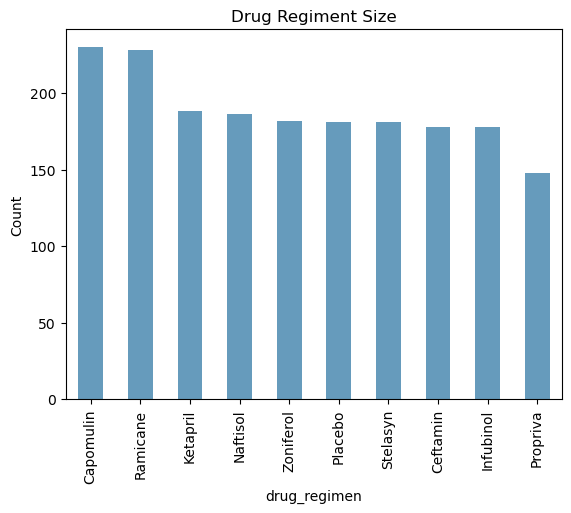

In [431]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("drug_regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regiment Size", ylabel="Count", color="#669bbc", width=0.5)
plt.show()

## Bar and Pie Charts

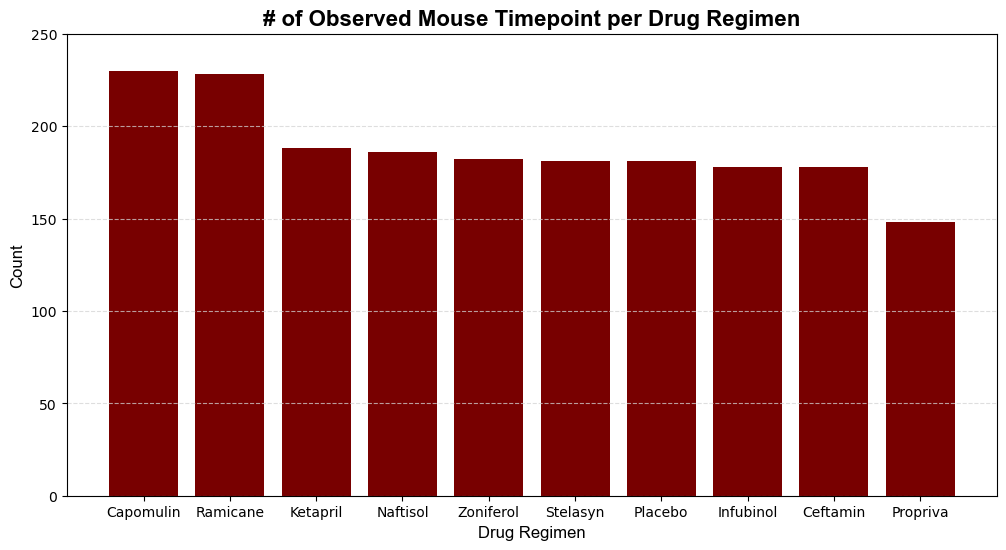

In [182]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Data Viz Recipe
# Option1: data=df2.groupby("drug_regimen").size().sort_values(ascending=False)
data=df2["drug_regimen"].value_counts().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic bar (doi chu plot thanh bar, khong can 2 dong nhu line chart, khong can label, marker.. ) 
plt.bar(data.index, data.values, color="#780000", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Count", fontfamily="Arial", fontsize=12)
plt.title("# of Observed Mouse Timepoint per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set Y Limits (khong can xlim vi la City). ylim = so lon hon trong day y
plt.ylim(0, 250)

# Add in a background grid ( VI khong muon soc dung thi ta them vao axis = "y" truoc linestyle) 
# plt.grid(axis="y"). Neu muon them thi dung lenh sau:
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# KHONG add Legend
# Show/Save the Graph
plt.show()

In [18]:
df2.head()

,mouse_id,Timepoint,tumor_volume_mm3,metastatic_sites,drug_regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
df2.Sex.value_counts()  # Check mouse in df2

Sex
Male      958
Female    922
Name: count, dtype: int64

In [184]:
df2.groupby("mouse_id")["Sex"].value_counts() # Test: Wrong mouse

mouse_id  Sex   
a203      Female    10
a251      Female    10
a262      Female    10
a275      Female    10
a366      Female     7
                    ..
z435      Female     3
z578      Male      10
z581      Female    10
z795      Female    10
z969      Male      10
Name: count, Length: 248, dtype: int64

In [122]:
option1 = df2[["mouse_id", "Sex"]].drop_duplicates()
option1

,mouse_id,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male
...,...,...
243,t565,Female
244,i557,Female
245,m957,Female
246,f966,Male


In [126]:
option2 = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989"]
option2.shape

(248, 5)

In [128]:
option1.Sex.value_counts()

Sex
Male      125
Female    123
Name: count, dtype: int64

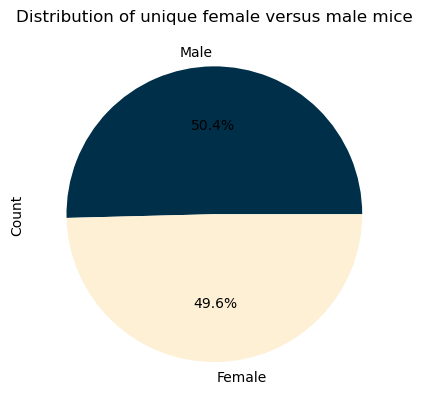

In [187]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
data=option1.Sex.value_counts()

# Make a pice chart:
data.plot(kind="pie", title="Distribution of unique female versus male mice",colors=["#003049", "#fdf0d5"], ylabel="Count", autopct="%1.1f%%") 
plt.show()


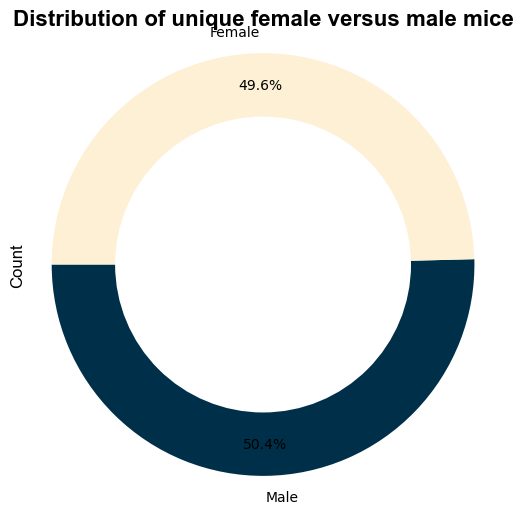

In [176]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart (Or upgrade to a Donut chart)

# Data Viz Recipe
data=option1.Sex.value_counts()
# WRONG: data = df2.Sex.value_counts().sort_values()

    
# Change Canvas Size
plt.figure(figsize=(6, 6))
    
# Create a basic plot
plt.pie(data.values, labels=data.index, colors=["#003049", "#fdf0d5"], autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85) 

# Add Labels/Title
plt.title("Distribution of unique female versus male mice", fontweight="bold", fontsize=16, fontfamily="Arial")
#Label
plt.ylabel("Count", fontfamily="Arial", fontsize=12)

# # Customizations (Just want to customize as DONUT as an extra Customizations to make it lookd prety by the folowwing additional lines)
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size for donut
plt.gca().add_artist(centre_circle)

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()


## Quartiles, Outliers and Boxplots

In [217]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = df2.groupby('mouse_id')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3=pd.merge(max_timepoint, df2, on=["mouse_id", "Timepoint"], how="left")
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mask=df3["drug_regimen"].isin(drugs) # it will return True of the drug regimen is in the list (drugs) 
df3=df3.loc[mask].reset_index(drop=True)
df3

,mouse_id,Timepoint,tumor_volume_mm3,metastatic_sites,drug_regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


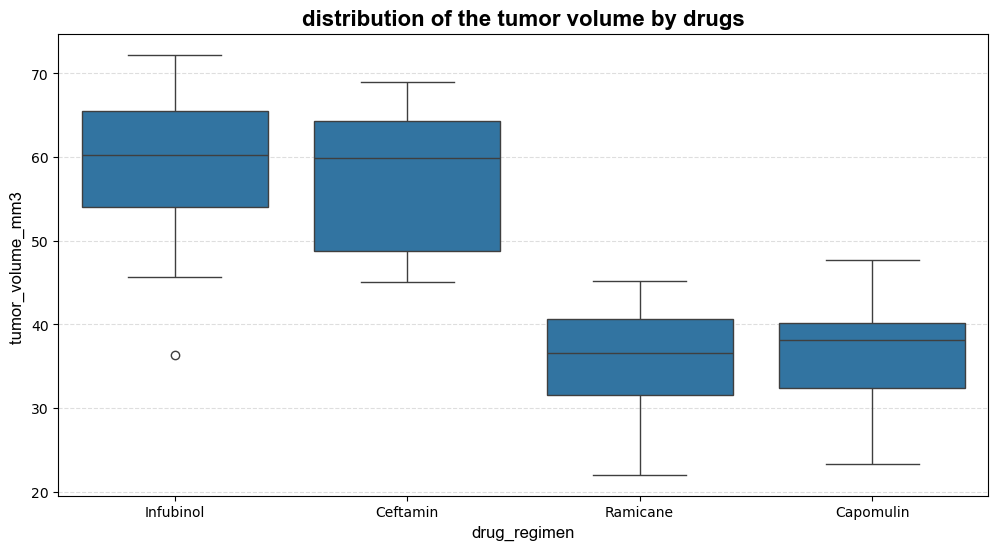

In [245]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=df3, y = "tumor_volume_mm3", x = "drug_regimen")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("tumor_volume_mm3 ", fontfamily="Arial", fontsize=12)
plt.xlabel("drug_regimen", fontfamily="Arial", fontsize=12)
plt.title("distribution of the tumor volume by drugs", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

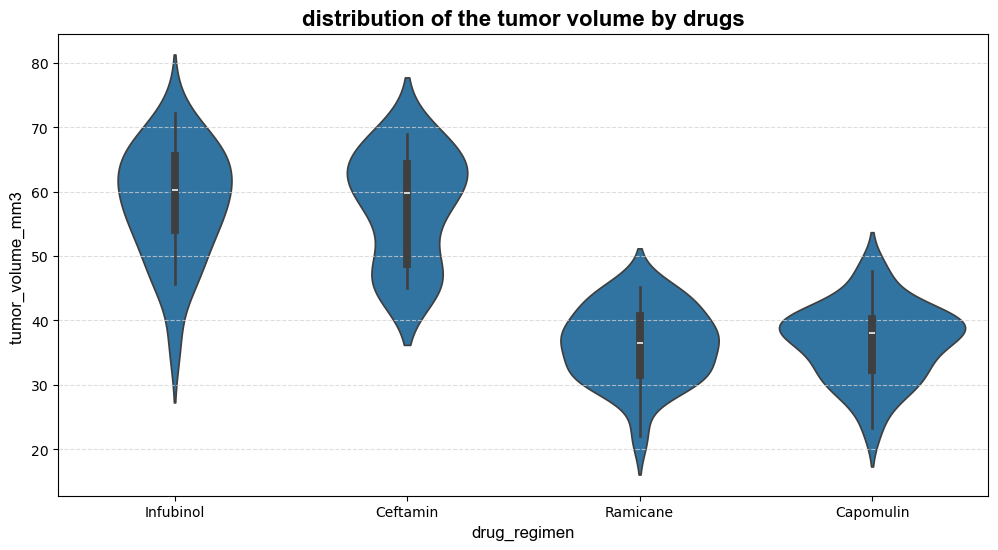

In [357]:
# Additional violinplot that shows the distribution of the tumor volume for each treatment grou:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.violinplot(data=df3, y = "tumor_volume_mm3", x = "drug_regimen")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("tumor_volume_mm3 ", fontfamily="Arial", fontsize=12)
plt.xlabel("drug_regimen", fontfamily="Arial", fontsize=12)
plt.title("distribution of the tumor volume by drugs", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [341]:
# Put treatments into a list for for loop (and later for plot labels) # with chatgpt code assistant 

treatments = df3["drug_regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = df3.loc[df3['drug_regimen'] == treatment, 'tumor_volume_mm3']

    # add subset
    tumor_volumes.append(treatment_data)

    # Calculate Q1 (first quartile) and Q3 (third quartile)
    Q1 = np.percentile(treatment_data, 25)
    Q3 = np.percentile(treatment_data, 75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers.tolist()}")     # Print out the results


Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []
Ramicane potential outliers: []
Capomulin potential outliers: []


C:\Users\kimkh\AppData\Local\Temp\ipykernel_1784\1615969682.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments)


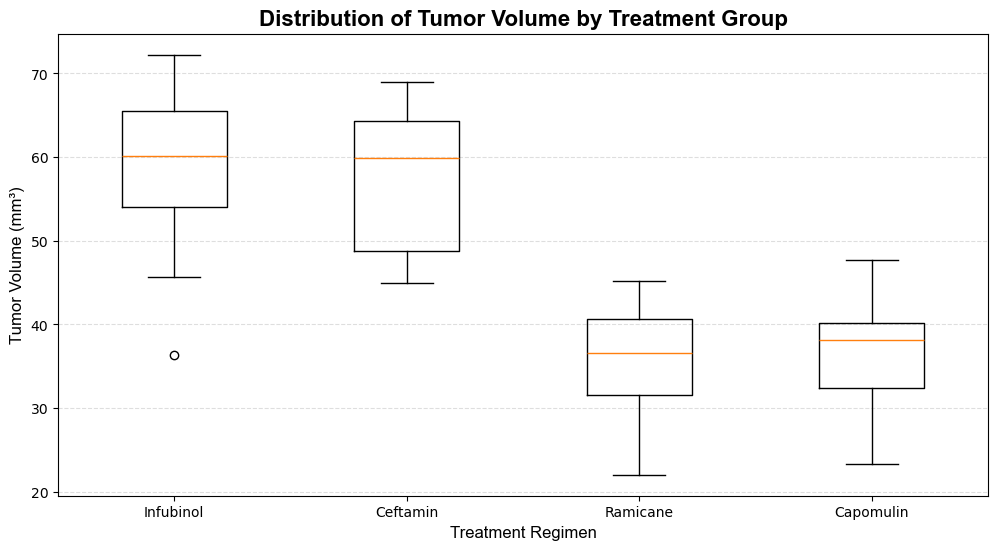

In [355]:
import matplotlib.pyplot as plt

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Generate the box plot
plt.boxplot(tumor_volumes, labels=treatments)

# Add title and labels
plt.title('Distribution of Tumor Volume by Treatment Group', fontweight="bold", fontsize=16, fontfamily="Arial")
plt.xlabel('Treatment Regimen', fontfamily="Arial", fontsize=12)
plt.ylabel('Tumor Volume (mm³)', fontfamily="Arial", fontsize=12)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show the graph
#plt.suptitle("")  # This removes the default title added by the boxplot
plt.show()

## Line and Scatter Plots

In [359]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_tumor_volume = df2[df2.drug_regimen == "Capomulin"]
capomulin_tumor_volume
df3 = capomulin_tumor_volume[["mouse_id", "Timepoint", "tumor_volume_mm3", "Weight (g)"]]
df3

,mouse_id,Timepoint,tumor_volume_mm3,Weight (g)
0,b128,0,45.000000,22
224,j246,0,45.000000,21
225,r554,0,45.000000,17
226,s185,0,45.000000,17
227,b742,0,45.000000,21
...,...,...,...,...
1841,s710,45,40.728578,23
1846,j119,45,38.125164,23
1865,i557,45,47.685963,24
1875,r944,45,41.581521,25


In [361]:
print(df3["mouse_id"].unique())

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


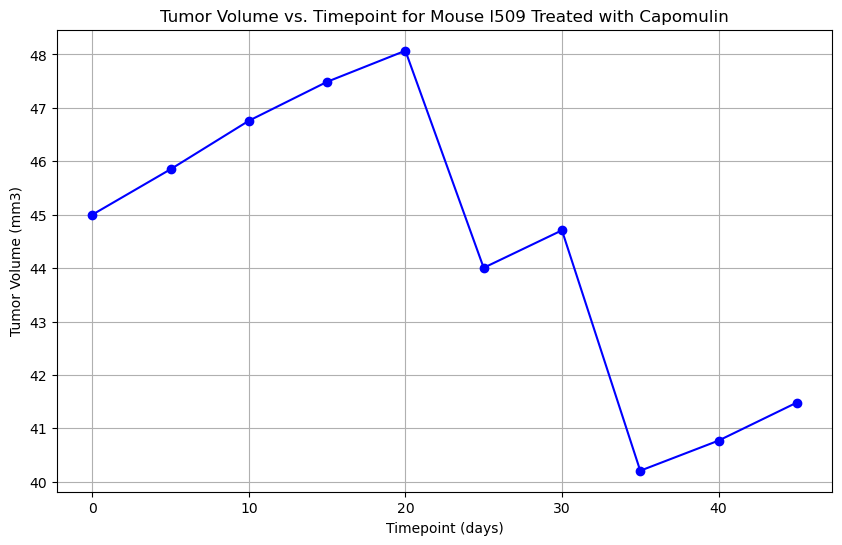

In [371]:
# Data Viz Recipe
mouse_id = "l509"
single_mouse_data = df3[df3["mouse_id"] == mouse_id]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data.tumor_volume_mm3, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} Treated with Capomulin')
plt.grid()

# Show the plot
plt.show()


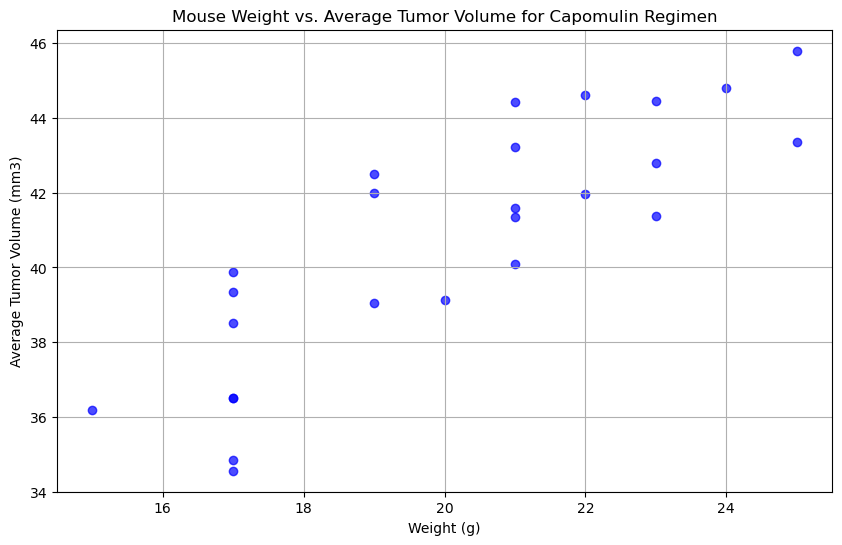

In [409]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame for the Capomulin treatment regimen

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_tumor_volume.groupby('mouse_id')['tumor_volume_mm3'].mean().reset_index()

# Merge the average tumor volume with the mouse weight data
mouse_weight_data = capomulin_tumor_volume[['mouse_id', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='mouse_id')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['tumor_volume_mm3'], color='b', alpha=0.7)

# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid()

# Show the plot
plt.show()

## Correlation and Regression

In [419]:
# Calculate the correlation coefficient and a linear regression model
correlation = merged_data['Weight (g)'].corr(merged_data['tumor_volume_mm3'])
print(f"Correlation coefficient: {correlation}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Correlation coefficient: 0.8419363424694722


In [423]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df3['Weight (g)'], df3['tumor_volume_mm3'])

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

# Create the linear regression line
regression_line = slope * merged_data['Weight (g)'] + intercept

Slope: 0.9609669432428355, Intercept: 21.489827213299566


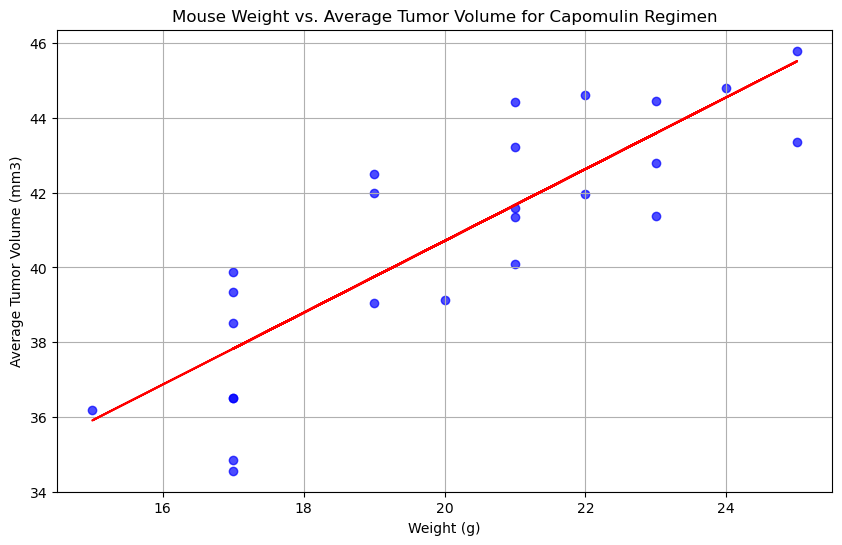

In [425]:

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['tumor_volume_mm3'], color='b', alpha=0.7)
plt.plot(merged_data['Weight (g)'], regression_line, color='r', label='Linear regression line')

# Adding labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid()


#plt.legend()


# Show the plot
plt.show()